In [ ]:
!pip install opendatasets

In [1]:
pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Modul 5 kel"

In [4]:
%cd /content/drive/MyDrive/Modul 5 kel

/content/drive/MyDrive/Modul 5 kel


In [ ]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection

 95% 212M/222M [00:02<00:00, 96.6MB/s]
100% 222M/222M [00:02<00:00, 85.2MB/s]


In [ ]:
ls

face-mask-detection.zip  kaggle.json


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [5]:
import os
base_dataset = '/content/drive/MyDrive/Modul 5 kel/Dataset'
class_dir = ['mask_weared_incorrect', 'with_mask', 'without_mask' ]
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir,item))

In [ ]:
!pip install split-folders
# Split Menjadi 80, 19, 1 %
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Modul 5 kel/Dataset',
                   output="/content/drive/MyDrive/Modul 5 kel/Fix-Dataset2",
                   seed=42, ratio=(.8 ,0.19 ,0.01), group_prefix=None)

Copying files: 8982 files [01:40, 89.48 files/s] 


In [6]:
dataset_awal ='/content/drive/MyDrive/Modul 5 kel/Dataset'
#tot_data_noclean = paper+rock+scissors

print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))
#print('Number of datas: {}'.format(tot_data_noclean))
print('')

mask_weared_incorrect = len(os.listdir(dataset_awal+'/mask_weared_incorrect'))
with_mask = len(os.listdir(dataset_awal+'/with_mask'))
without_mask = len(os.listdir(dataset_awal+'/without_mask'))

print("DATASET AWAL ")
print('mask_weared_incorrect : ', mask_weared_incorrect)
print('with_mask : ', with_mask)
print('without_mask : ', without_mask)

Number of classes: 3

DATASET AWAL 
mask_weared_incorrect :  2994
with_mask :  2994
without_mask :  2994


In [7]:
#Define a path
base_dir = '/content/drive/MyDrive/Modul 5 kel/Fix-Dataset2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_mask_weared_incorrect_dir = os.path.join(train_dir, 'mask_weared_incorrect')
train_with_mask_dir = os.path.join(train_dir, 'with_mask')
train_without_mask_dir = os.path.join(train_dir, 'without_mask')

validation_mask_weared_incorrect_dir = os.path.join(validation_dir, 'mask_weared_incorrect')
validation_with_mask_dir = os.path.join(validation_dir, 'with_mask')
validation_without_mask_dir = os.path.join(validation_dir, 'without_mask')

test_mask_weared_incorrect_dir = os.path.join(test_dir, 'mask_weared_incorrect')
test_with_mask_dir = os.path.join(test_dir, 'with_mask')
test_without_mask_dir = os.path.join(test_dir, 'without_mask')

In [8]:
print('Train : ')
print('Train mask_weared_incorrect :', len(os.listdir(train_mask_weared_incorrect_dir)))
print('Train with_mask : ', len(os.listdir(train_with_mask_dir)))
print('Train without_mask : ', len(os.listdir(train_without_mask_dir)))
print(""*2)
print('Validation : ')
print('Validation mask_weared_incorrect :', len(os.listdir(validation_mask_weared_incorrect_dir)))
print('Validationn with_mask : ', len(os.listdir(validation_with_mask_dir)))
print('Validation without_mask : ', len(os.listdir(validation_without_mask_dir)))
print(""*2)
print('Test : ')
print('Test mask_weared_incorrect :', len(os.listdir(test_mask_weared_incorrect_dir)))
print('Test with_mask : ', len(os.listdir(test_with_mask_dir)))
print('Test without_mask : ', len(os.listdir(test_without_mask_dir)))

Train : 
Train mask_weared_incorrect : 2395
Train with_mask :  2395
Train without_mask :  2395

Validation : 
Validation mask_weared_incorrect : 568
Validationn with_mask :  568
Validation without_mask :  568

Test : 
Test mask_weared_incorrect : 31
Test with_mask :  31
Test without_mask :  31


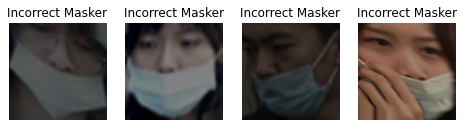

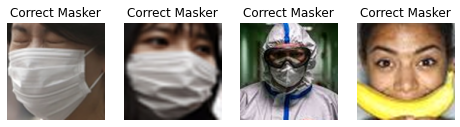

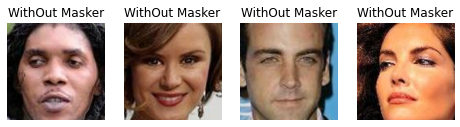

In [9]:
#1.3 Gambar
# Tampilkan 8 image per kelas dengan ukuran 2x4

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

mask_wear_incorr = os.listdir(train_mask_weared_incorrect_dir)
with_mask = os.listdir(train_with_mask_dir)
without_mask = os.listdir(train_without_mask_dir)

fname1 = [os.path.join(train_mask_weared_incorrect_dir, fname)
        for fname in mask_wear_incorr[:4]]
fname2 = [os.path.join(train_with_mask_dir, fname)
        for fname in with_mask[:4]]
fname3 = [os.path.join(train_without_mask_dir, fname)
        for fname in without_mask[:4]]


nrows = 2
ncols = 4
#Incorrect Masker
fig = plt.gcf()
fig.set_size_inches( ncols * 2,nrows * 2)
for i,fname in enumerate(fname1):
  sp = plt.subplot(2,4,i+1)
  sp.axis('off')
  img = mping.imread(fname)
  plt.title('Incorrect Masker')
  plt.imshow(img)
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Correct Masker')
    plt.imshow(img)
    
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('WithOut Masker')
    plt.imshow(img)
    
plt.show()

In [10]:
height = 100
width = 100
batch_size = 32

In [11]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [12]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #np.clip(img, 0., 255.)
    return img

In [13]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    preprocessing_function=add_noise,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

TRAINING_DIR = "/content/drive/MyDrive/Modul 5 kel/Fix-Dataset2/train"
VALIDATION_DIR = "/content/drive/MyDrive/Modul 5 kel/Fix-Dataset2/val"
TEST_DIR = "/content/drive/MyDrive/Modul 5 kel/Fix-Dataset2/test"

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 7185 images belonging to 3 classes.
Found 1704 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


In [14]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

In [15]:
baseModel = VGG19(input_shape = (100,100,3),
                           include_top = False,
                           weights = "imagenet")
baseModel.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [16]:
class FCHeadNet:
    def build(baseModel, classes, D):
        headModel = baseModel.output
        headModel = Flatten(name="flatten")(headModel)
        headModel = Dense(D, activation='relu')(headModel)
        headModel = Dropout(0.4)(headModel)
        headModel = Dense(classes, activation='softmax')(headModel)
        return headModel

In [17]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [18]:
headModel = FCHeadNet.build(baseModel, 3, 100)
model = Model(inputs=baseModel.input, outputs=headModel)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
direc = '/content/drive/MyDrive/Modul 5 kel/Penugasan5_VGG19.h5'
best_model = ModelCheckpoint(direc, monitor='val_acc', verbose = 1, save_best_only = True)

In [23]:
H = model.fit(train_generator,
              epochs=150,
              steps_per_epoch=10,  # images = batch_size * steps
              verbose=1,
              validation_data=validation_generator,
              callbacks=[callbacks, best_model])

Epoch 1/150
10/10 [==============================] - ETA: 0s - loss: 1.2462 - acc: 0.4313
Epoch 00001: val_acc improved from -inf to 0.69660, saving model to /content/drive/MyDrive/Modul 5 kel/Penugasan5_VGG19.h5
10/10 [==============================] - 495s 53s/step - loss: 1.2462 - acc: 0.4313 - val_loss: 0.7269 - val_acc: 0.6966
Epoch 2/150
10/10 [==============================] - ETA: 0s - loss: 0.8690 - acc: 0.6098
Epoch 00002: val_acc improved from 0.69660 to 0.71831, saving model to /content/drive/MyDrive/Modul 5 kel/Penugasan5_VGG19.h5
10/10 [==============================] - 82s 8s/step - loss: 0.8690 - acc: 0.6098 - val_loss: 0.6690 - val_acc: 0.7183
Epoch 3/150
10/10 [==============================] - ETA: 0s - loss: 0.7742 - acc: 0.6750
Epoch 00003: val_acc improved from 0.71831 to 0.73885, saving model to /content/drive/MyDrive/Modul 5 kel/Penugasan5_VGG19.h5
10/10 [==============================] - 80s 8s/step - loss: 0.7742 - acc: 0.6750 - val_loss: 0.6328 - val_acc: 0.7

In [24]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

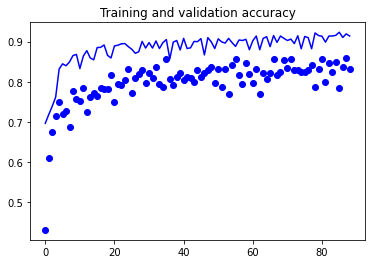

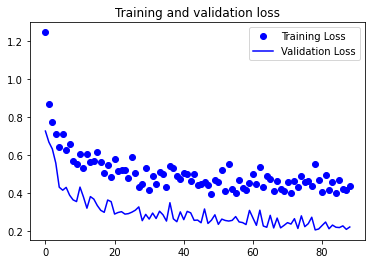

In [25]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['mask_weared_incorrect', 'with_mask', 'without_mask']


In [27]:
#Result Accuracy Modul4
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                       precision    recall  f1-score   support

mask_weared_incorrect       0.91      0.94      0.92        31
            with_mask       0.93      0.87      0.90        31
         without_mask       0.97      1.00      0.98        31

             accuracy                           0.94        93
            macro avg       0.94      0.94      0.93        93
         weighted avg       0.94      0.94      0.93        93



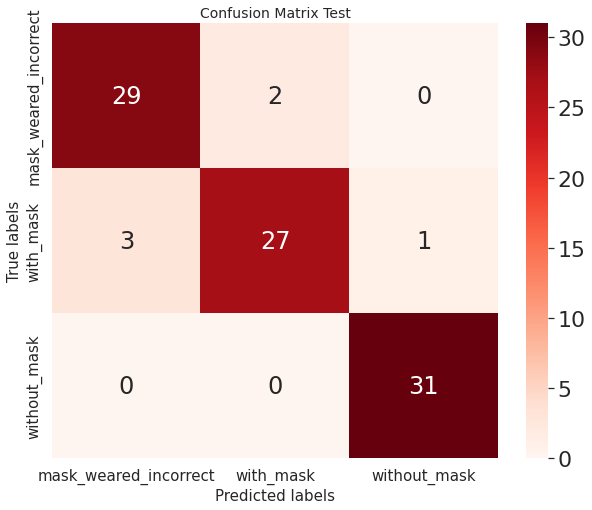

In [31]:
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()